In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns',200)
pd.set_option('display.width',400)

In [2]:
df0 = pd.read_csv('loan.csv' , low_memory=False)

In [3]:
df0.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


### First we drop all the columns with all NaN values present

In [4]:
df0 = df0.dropna(axis=1 , how='all')

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Removing the Demographic and Behavioural Features

In the info we can see that there are some columns with information like Payment plan, url, id, member_id, address state etc. which are of no use in the Approval process and mostly depend on post loan approval data. There are some columns which contain only single value like policy_code, acc_now_delinq, application type etc. which are also to be dropped.

In [6]:
columns_to_drop = ['id','member_id','funded_amnt','emp_title','pymnt_plan','url','desc','title','zip_code','delinq_2yrs','mths_since_last_delinq','mths_since_last_record','revol_bal','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','application_type','pub_rec_bankruptcies']

In [7]:
df0.drop(columns_to_drop, axis=1 , inplace=True)

In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

### Now we check if there are any missing values in the remaining columns

In [9]:
df0.columns[df0.isna().any()]

Index(['emp_length', 'revol_util'], dtype='object')

In [10]:
## Here we see there are Null values present in two columns i.e. emp_length and revol_util. So we check what we can do in them.

In [10]:
df0.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [11]:
df0.emp_length.isnull().sum()

1075

In [12]:
### Here we see that 1075 values out of 39717 values are null which is around 2.3%.
### It is highly dependent value so we cannot impute the NaN with some other values, better we drop them.
df0.dropna(axis=0 , subset=['emp_length'] , inplace=True)

In [13]:
df0.revol_util.value_counts()

0%        941
0.20%      62
63%        61
66.70%     57
40.70%     57
         ... 
0.83%       1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1087, dtype: int64

In [14]:
df0.revol_util.isnull().sum()

47

In [15]:
## Here we can see that there are only 47 entries in revol_util column with null values, which is around 0.11%.
## Thus it is better to drop this values.

In [16]:
df0.dropna(axis=0 , subset=['revol_util'] , inplace=True)

In [17]:
df0.isnull().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
dtype: int64

Now there are no null values present in the dataframe.
We need to standardize the data in order to make it compatible for analysis

In [18]:
df0.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [19]:
## Here we can remove the records with loan status as 'Current', as the loan is currently running and we cannot infer anything regarding defaulters from it

In [20]:
df0.loan_status.value_counts()

Fully Paid     32113
Charged Off     5384
Current         1098
Name: loan_status, dtype: int64

In [21]:
df0 = df0[~(df0['loan_status'] == 'Current')]

In [22]:
## We need to remove the % sign form int_rate and revol_util and change the datatype to float

In [23]:
df0['int_rate'] = df0.int_rate.str.split('%').str[0].astype(float)

In [24]:
df0['revol_util'] = df0.revol_util.str.split('%').str[0].astype(float)

In [25]:
## Now we can change the loan status values to 0 if Fully paid and 1 if Defaulter.

df0['loan_status'] = df0.loan_status.map(lambda x: 0 if x=='Fully Paid' else 1)

In [26]:
## We look at the values in Emp_length column

In [27]:
df0.emp_length.value_counts()

10+ years    8487
< 1 year     4496
2 years      4286
3 years      4008
4 years      3335
5 years      3190
1 year       3163
6 years      2165
7 years      1708
8 years      1433
9 years      1226
Name: emp_length, dtype: int64

In [28]:
## Here for 10+ years we need to change it to 10 and for less than 1 year we need to change it to 0 and all the values to int format

In [29]:
df0['emp_length']=pd.to_numeric(df0.emp_length.apply(lambda x:0 if '<' in x else x.split('+')[0] if '+' in x else x.split()[0]))

In [30]:
df0.emp_length.value_counts()

10    8487
0     4496
2     4286
3     4008
4     3335
5     3190
1     3163
6     2165
7     1708
8     1433
9     1226
Name: emp_length, dtype: int64

In [31]:
## Now we look at the purpose column values

In [32]:
df0.purpose.value_counts()

debt_consolidation    17664
credit_card            4897
other                  3700
home_improvement       2782
major_purchase         2074
small_business         1709
car                    1446
wedding                 912
medical                 654
moving                  550
house                   354
vacation                347
educational             314
renewable_energy         94
Name: purpose, dtype: int64

In [33]:
df0.purpose.value_counts()*100/df0.shape[0]  #Percentage values

debt_consolidation   47.11
credit_card          13.06
other                 9.87
home_improvement      7.42
major_purchase        5.53
small_business        4.56
car                   3.86
wedding               2.43
medical               1.74
moving                1.47
house                 0.94
vacation              0.93
educational           0.84
renewable_energy      0.25
Name: purpose, dtype: float64

In [34]:
## We can drop the rows with less than 1% of the purpose percentage

In [35]:
loan_purpose_percent = df0.purpose.value_counts()*100 / df0.shape[0]

loan_purpose_delete = loan_purpose_percent[loan_purpose_percent < 1].index.values

print(loan_purpose_delete)

['house' 'vacation' 'educational' 'renewable_energy']


In [36]:
df0 = df0[[False if p in loan_purpose_delete else True for p in df0.purpose]]

In [37]:
df0.purpose.value_counts()*100/df0.shape[0]

debt_consolidation   48.54
credit_card          13.46
other                10.17
home_improvement      7.65
major_purchase        5.70
small_business        4.70
car                   3.97
wedding               2.51
medical               1.80
moving                1.51
Name: purpose, dtype: float64

## Now we check for outliers present for some of the features

### 1. Annual_income

C:\Users\Anand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


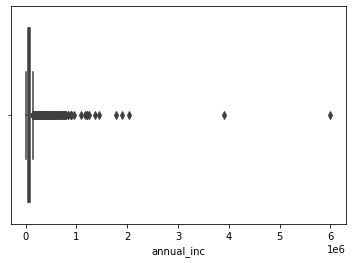

In [38]:
sns.boxplot(df0.annual_inc)
plt.show()

In [39]:
df0.annual_inc.describe()  ## Here max value is around 100 times the mean value. We need to remove outliers from annual_inc

count     36388.00
mean      69540.19
std       64953.76
min        4080.00
25%       41496.00
50%       60000.00
75%       83000.00
max     6000000.00
Name: annual_inc, dtype: float64

In [40]:
top_annual_inc = df0.annual_inc.quantile(0.99)
top_annual_inc

234996.52

In [41]:
df0 = df0[df0.annual_inc < top_annual_inc]

C:\Users\Anand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

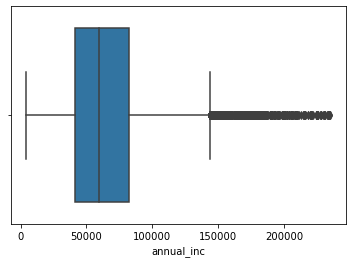

In [42]:
sns.boxplot(df0.annual_inc)

### 2. Open_acc

C:\Users\Anand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='open_acc'>

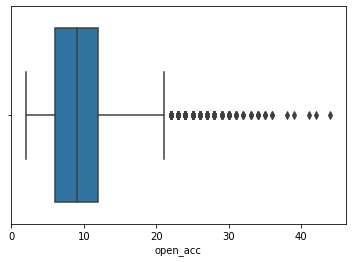

In [43]:
sns.boxplot(df0.open_acc)

In [44]:
df0.open_acc.describe()    ## Here we see max value is approx. 5 times mean value hence outliers need to be removed.

count   36024.00
mean        9.31
std         4.38
min         2.00
25%         6.00
50%         9.00
75%        12.00
max        44.00
Name: open_acc, dtype: float64

In [45]:
top_open_acc = df0.open_acc.quantile(0.999)
top_open_acc

30.0

In [46]:
df0 = df0[df0.open_acc < top_open_acc]

In [47]:
df0.open_acc.describe()

count   35983.00
mean        9.28
std         4.31
min         2.00
25%         6.00
50%         9.00
75%        12.00
max        29.00
Name: open_acc, dtype: float64

C:\Users\Anand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='open_acc'>

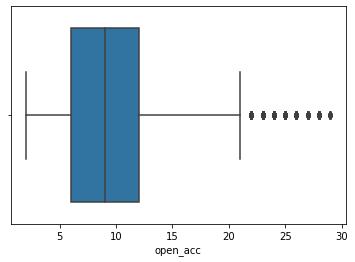

In [48]:
sns.boxplot(df0.open_acc)

### 3. Total_acc

In [49]:
df0.total_acc.describe()

count   35983.00
mean       22.03
std        11.30
min         2.00
25%        14.00
50%        20.00
75%        29.00
max        90.00
Name: total_acc, dtype: float64

C:\Users\Anand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_acc'>

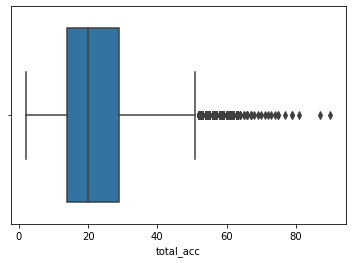

In [50]:
sns.boxplot(df0.total_acc)

In [51]:
top_total_acc = df0.total_acc.quantile(0.99)
top_total_acc

55.0

In [52]:
df0 = df0[df0.total_acc < top_total_acc]

C:\Users\Anand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_acc'>

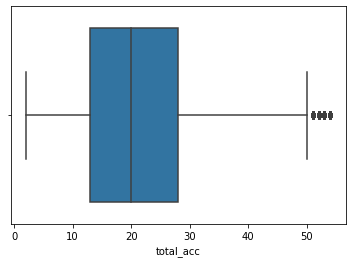

In [53]:
sns.boxplot(df0.total_acc)

### 4. Pub_rec

In [54]:
df0.pub_rec.describe()

count   35602.00
mean        0.05
std         0.24
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         4.00
Name: pub_rec, dtype: float64

C:\Users\Anand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pub_rec'>

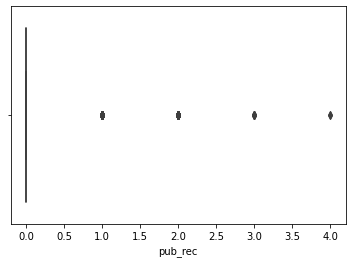

In [55]:
sns.boxplot(df0.pub_rec)

In [56]:
total_pub_rec = df0.pub_rec.quantile(0.99)

In [57]:
df0 = df0[df0.pub_rec < total_pub_rec]

C:\Users\Anand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pub_rec'>

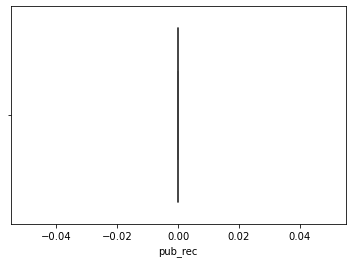

In [58]:
sns.boxplot(df0.pub_rec)

## Deriving new metrics

### 1. Isssue date

We can see that issue date is not in standard format, we need to convert it in standard form and split it in two columns of Month and Year which makes easy for analysis.

In [59]:
df0.issue_d

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39712    Jul-07
39713    Jul-07
39714    Jul-07
39715    Jul-07
39716    Jun-07
Name: issue_d, Length: 33732, dtype: object

In [60]:
from datetime import datetime

In [61]:
df0['issue_d'] = pd.to_datetime(df0["issue_d"].apply(lambda x: datetime.strptime(x,'%b-%y'))).dt.strftime('%m-%Y') 

In [62]:
df0['month'] = pd.DatetimeIndex(df0.issue_d).month
df0['year'] = pd.DatetimeIndex(df0.issue_d).year

### 2. Earliest credit line

In [63]:
df0.earliest_cr_line

0        Jan-85
1        Apr-99
2        Nov-01
3        Feb-96
5        Nov-04
          ...  
39712    Nov-90
39713    Dec-86
39714    Oct-98
39715    Nov-88
39716    Oct-03
Name: earliest_cr_line, Length: 33732, dtype: object

In [64]:
df0['earliest_cr_line'] = df0.earliest_cr_line.str.split('-').str[1].astype(int)

### 3. Create bins for some continuous variables

### a. Loan amount range

In [65]:
bins = [0,5000,10000,15000,20000,25000,36000]
buck = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000+']
df0['loan_amt_range'] = pd.cut(df0.loan_amnt , bins , labels=buck)

### b. Interest rate range

In [66]:
bins = [0,7.5,10,12.5,15,100]
buck = ['0-7.5','7.5-10','10-12.5','12.5-15','15+']
df0['int_rate_range'] = pd.cut(df0.int_rate , bins , labels=buck)

### c. Annual Income range

In [67]:
bins = [0,25000,50000,75000,100000,1000000]
buck = ['0-25000','25000-50000','50000-75000','75000-100000','100000+']
df0['annual_inc_range'] = pd.cut(df0.annual_inc , bins , labels=buck)

### d. Installment range

In [68]:
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <= 800:
        return 'high'
    else:
        return 'very high'
    
df0.installment = df0.installment.apply(lambda x: installment(x))